Initial timeseries on non-calibrated raw data

In [111]:
import sys
sys.path.append("..")

import pandas as pd 
from channeling_lib import AWS_file_loader, save_figure, load_path
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



# Specify general folder:
aws_nonCal_path = load_path()+'RawData/AWS/'
aws_Cal_path = load_path()+'CalibratedData/AWS/'


stations_str = ['Tom Joad','Rosanna','Bette Davis', 'Layla', 'Mrs Robinson']
# FROM LOW TO HIGH

In [112]:
aws_nonCal_data = {}
cutoff_date = pd.Timestamp("2025-01-26")


# Loop through each station
for station in stations_str:
    station_folder = os.path.join(aws_nonCal_path, station)  # Full folder path
    
    # Find all .dat files in the folder
    dat_files = glob.glob(os.path.join(station_folder, "*.dat"))
    
    # Load all .dat files using AWS_file_loader
    aws_nonCal_data[station] = [
        AWS_file_loader(file).iloc[:-3].loc[lambda df: df.index > cutoff_date] for file in dat_files
    ]

c:\Users\Paula\anaconda3\envs\Boundary_Layer\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
c:\Users\Paula\anaconda3\envs\Boundary_Layer\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
c:\Users\Paula\anaconda3\envs\Boundary_Layer\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_object

In [113]:
type(aws_nonCal_data['Bette Davis'][0])

pandas.core.frame.DataFrame

In [114]:
#color_idx = ['#440154', '#3b528b', '#21918c', '#5ec962', '#fde725']
color_idx = ['#440154', '#3b528b', '#21918c', '#5ec962', '#655C0E']

## Timeseries of non-calibrated data

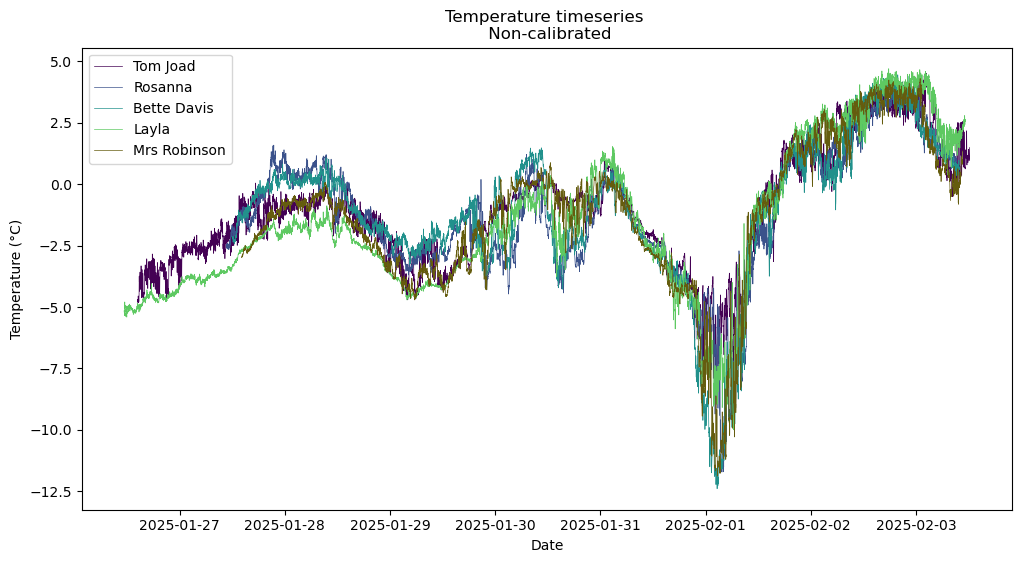

In [115]:
# Temperature timeseries
fig, ax = plt.subplots(figsize=(12, 6))

for i, station in enumerate(stations_str):
    ax.plot(aws_nonCal_data[station][0].index, aws_nonCal_data[station][0].temperature, label=station, linewidth = 0.5, color=color_idx[i])
    ax.plot(aws_nonCal_data[station][1].index, aws_nonCal_data[station][1].temperature, linewidth = 0.5, color=color_idx[i])
    

ax.set_xlabel("Date")
ax.set_ylabel("Temperature (°C)")
ax.set_title("Temperature timeseries \n Non-calibrated")
ax.legend()

#save_figure(fig, '../figs/', 'nonCalibrated_temp_timeseries')

> There is less variability in the stations near the water, more up Adventdalen.

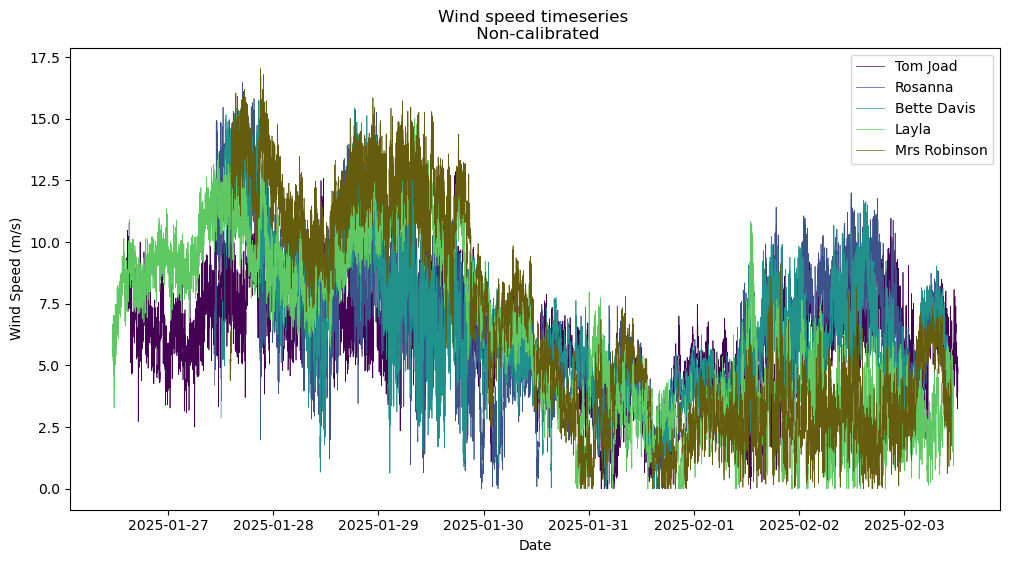

In [116]:
# Wind speed timeseries

fig, ax = plt.subplots(figsize=(12, 6))

for i, station in enumerate(stations_str):
    ax.plot(aws_nonCal_data[station][1].index, aws_nonCal_data[station][1].wind_speed, label=station, linewidth=0.5, color=color_idx[i])
    ax.plot(aws_nonCal_data[station][0].index, aws_nonCal_data[station][0].wind_speed, linewidth=0.5, color=color_idx[i])

ax.set_xlabel("Date")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title("Wind speed timeseries \n Non-calibrated")
ax.legend()

#save_figure(fig, '../figs/', 'nonCalibrated_windSpeed_timeseries')

> Low pressure: higher wind upvalley than downvalley, low pressure: lower wind upvalley than down valley.

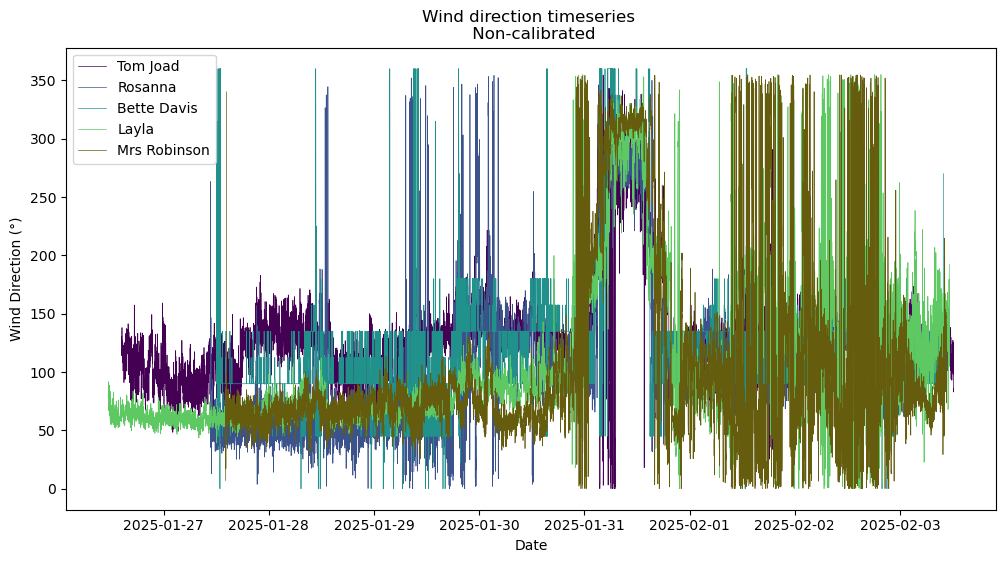

In [117]:
# Wind direction timeseries

fig, ax = plt.subplots(figsize=(12, 6))

for i, station in enumerate(stations_str):
    ax.plot(aws_nonCal_data[station][0].index, aws_nonCal_data[station][0].wind_direction, label=station, linewidth = 0.5,  color=color_idx[i])
    ax.plot(aws_nonCal_data[station][1].index, aws_nonCal_data[station][1].wind_direction, linewidth = 0.5,  color=color_idx[i])

ax.set_xlabel("Date")
ax.set_ylabel("Wind Direction (°)")
ax.set_title("Wind direction timeseries \n Non-calibrated")
ax.legend()

#save_figure(fig, '../figs/', 'nonCalibrated_windDirection_timeseries')

> Pressure change: very different winds!!

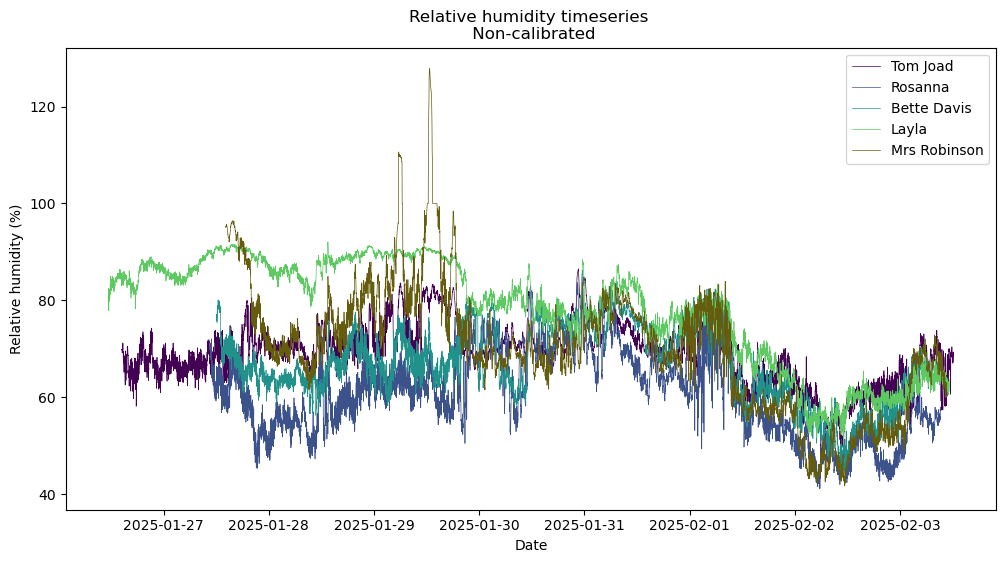

In [118]:
# relative humidity timeseries

fig, ax = plt.subplots(figsize=(12, 6))

for i, station in enumerate(stations_str):
    ax.plot(aws_nonCal_data[station][0].index, aws_nonCal_data[station][0].rel_humidity, label=station, linewidth = 0.5, color=color_idx[i])
    ax.plot(aws_nonCal_data[station][1].index, aws_nonCal_data[station][1].rel_humidity, linewidth = 0.5, color=color_idx[i])

ax.set_xlabel("Date")
ax.set_ylabel("Relative humidity (%)")
ax.set_title("Relative humidity timeseries \n Non-calibrated")
ax.legend()

#save_figure(fig, '../figs/', 'nonCalibrated_relHumidity_timeseries')

> Higher up: higher relative humidity, but is it just because of a lower temperature? Is the absolute air water content the same?

Text(0.5, 1.0, 'Air pressur timeseries \n Non-calibrated')

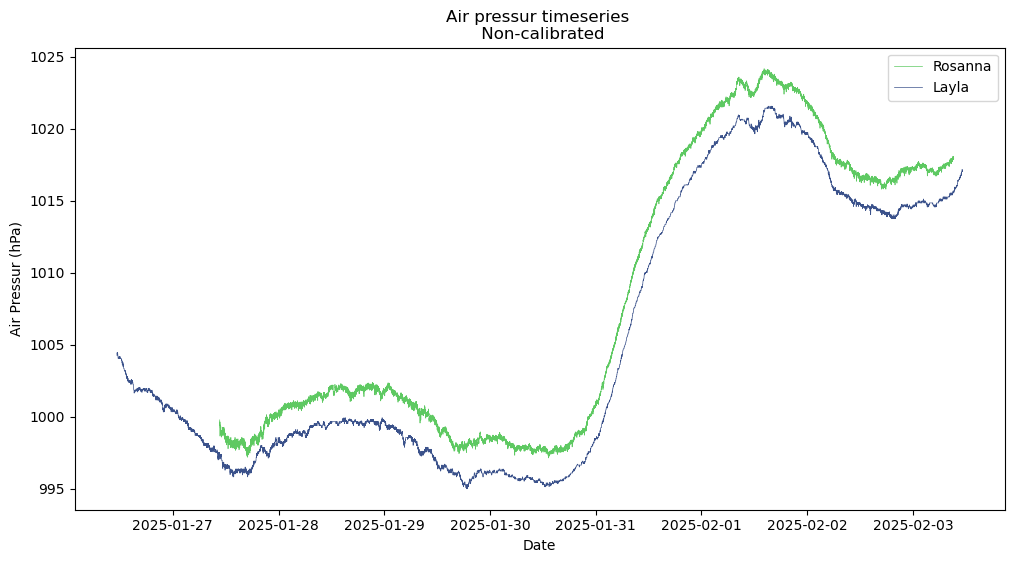

In [119]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(aws_nonCal_data['Rosanna'][0].index, aws_nonCal_data['Rosanna'][0].air_pressure, label='Rosanna', linewidth = 0.5, color=color_idx[3])
ax.plot(aws_nonCal_data['Rosanna'][1].index, aws_nonCal_data['Rosanna'][1].air_pressure, linewidth = 0.5, color=color_idx[3])
ax.plot(aws_nonCal_data['Layla'][0].index, aws_nonCal_data['Layla'][0].air_pressure, label='Layla', linewidth = 0.5, color=color_idx[1])
ax.plot(aws_nonCal_data['Layla'][1].index, aws_nonCal_data['Layla'][1].air_pressure, linewidth = 0.5, color=color_idx[1])
ax.legend()
ax.set_xlabel("Date")
ax.set_ylabel("Air Pressur (hPa)")
ax.set_title("Air pressur timeseries \n Non-calibrated")

#save_figure(fig, '../figs/', 'nonCalibrated_pressure_timeseries')

> Is the Pressure difference only due to the elevation difference?

## Timeseries of calibrated data

In [120]:
aws_Cal_data = {}
# Find all CSV files in the directory
csv_files = glob.glob(os.path.join(aws_Cal_path, "*.csv"))

# Create a mapping from expected station names to their file names
station_mapping = {s.replace(" ", "").lower(): s for s in stations_str}

# Loop through each CSV file and store it in the dictionary
for file in csv_files:
    # Extract the filename without extension
    file_name = os.path.splitext(os.path.basename(file))[0]  # e.g., "Rosanna_filtered_data"

    # Normalize the filename (remove spaces, lowercase) to match stations_str keys
    normalized_name = file_name.replace("_filtered_data", "").replace(" ", "").lower()

    # Check if the filename matches one of the station names
    if normalized_name in station_mapping:
        station_name = station_mapping[normalized_name]  # Get correct station name from mapping
        aws_Cal_data[station_name] = pd.read_csv(file)
        # aws_Cal_data[station_name].TIMESTAMP = pd.to_datetime(aws_Cal_data[station_name].TIMESTAMP)
        aws_Cal_data[station_name]["TIMESTAMP"] = pd.to_datetime(aws_Cal_data[station_name]["TIMESTAMP"])  # Convert
        aws_Cal_data[station_name].set_index("TIMESTAMP", inplace=True)  # Set as index


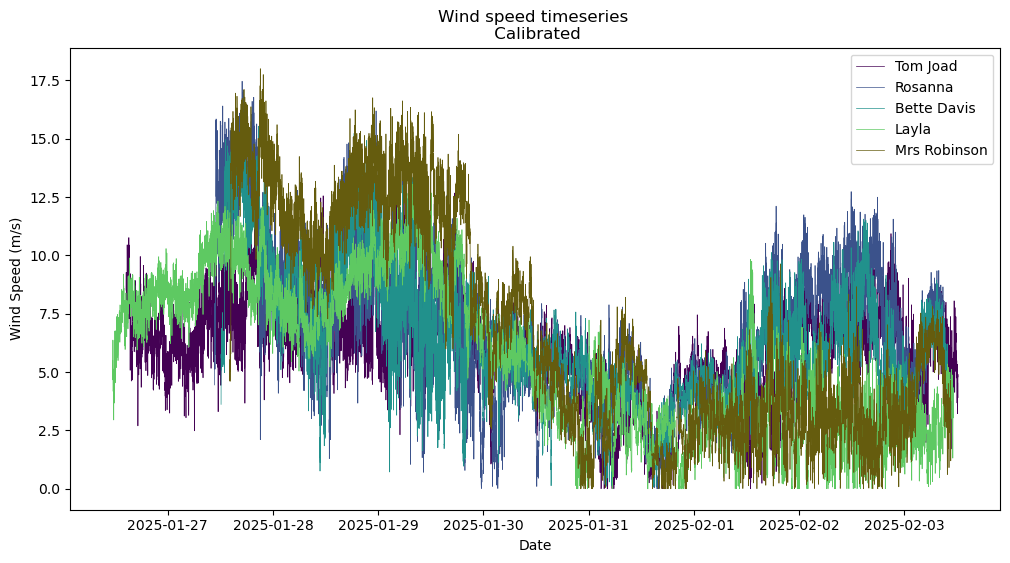

In [121]:
# Wind speed timeseries

fig, ax = plt.subplots(figsize=(12, 6))

for i, station in enumerate(stations_str):
    ax.plot(aws_Cal_data[station].index, aws_Cal_data[station].calibrated_wind_speed, label=station, linewidth=0.5, color=color_idx[i])

ax.set_xlabel("Date")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title("Wind speed timeseries \n Calibrated")
ax.legend()

#save_figure(fig, '../figs/', 'Calibrated_windSpeed_timeseries')

Text(0.5, 0.92, 'Wind Speed Timeseries - Calibrated')

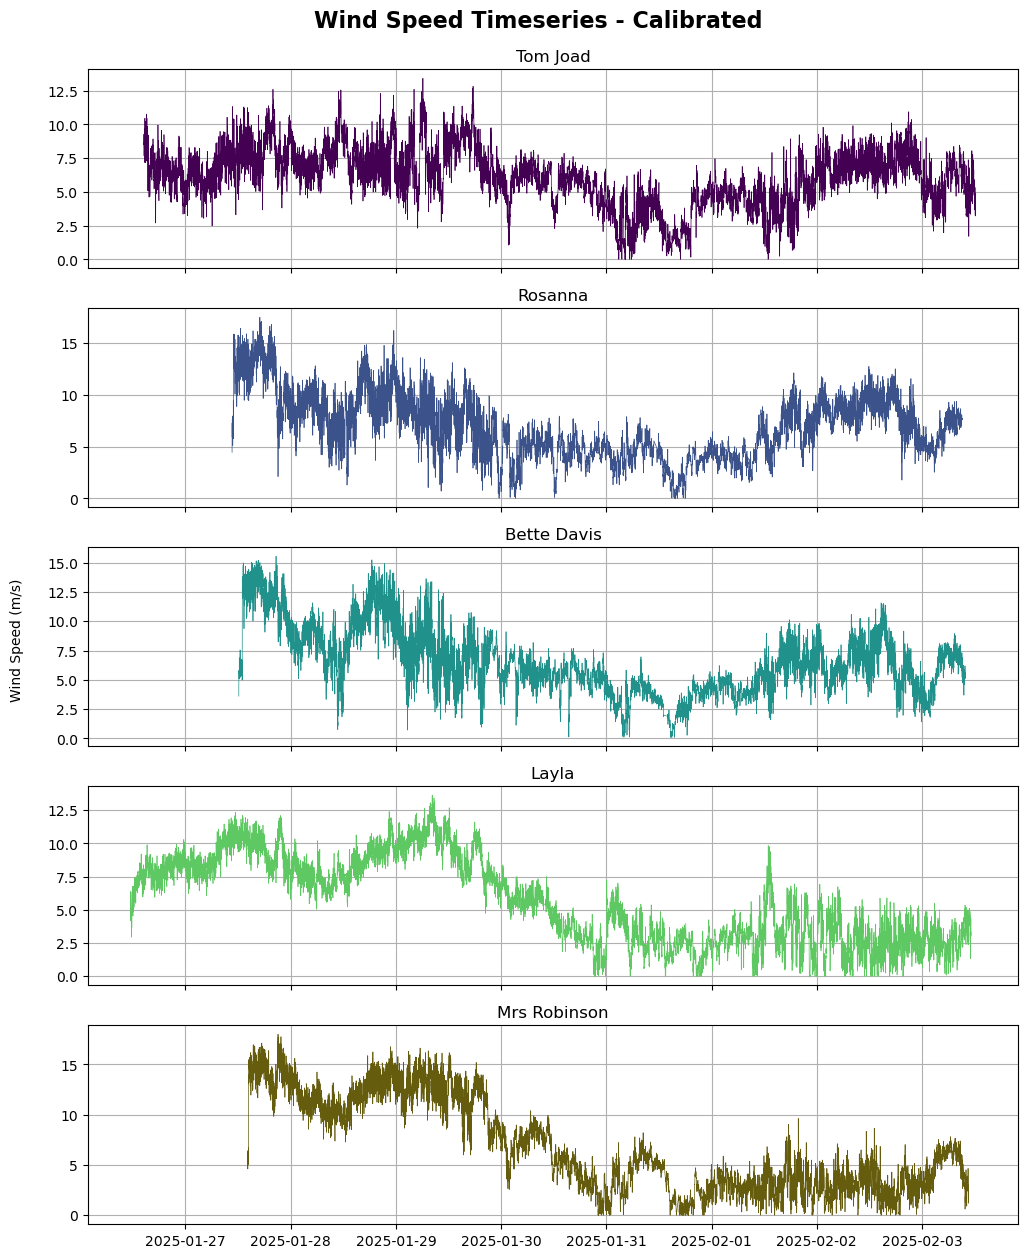

In [122]:
fig, axes = plt.subplots(nrows=5, sharex=True, figsize=(12, 15))

for i, station in enumerate(stations_str):
    ax = axes[i]

    # Plot wind speed timeseries for each station
    ax.plot(aws_Cal_data[station].index, aws_Cal_data[station].calibrated_wind_speed, 
            label=station, linewidth=0.5, color=color_idx[i])

    # Set subplot title
    ax.set_title(station)
    ax.grid()

fig.text(0.06, 0.5, "Wind Speed (m/s)", va='center', rotation = 'vertical')
fig.suptitle("Wind Speed Timeseries - Calibrated", fontsize=16, fontweight='bold', y=0.92)


#save_figure(fig, '../figs/', 'Calibrated_windSpeed_timeseries_subplot')

## Hourly mean comparisons

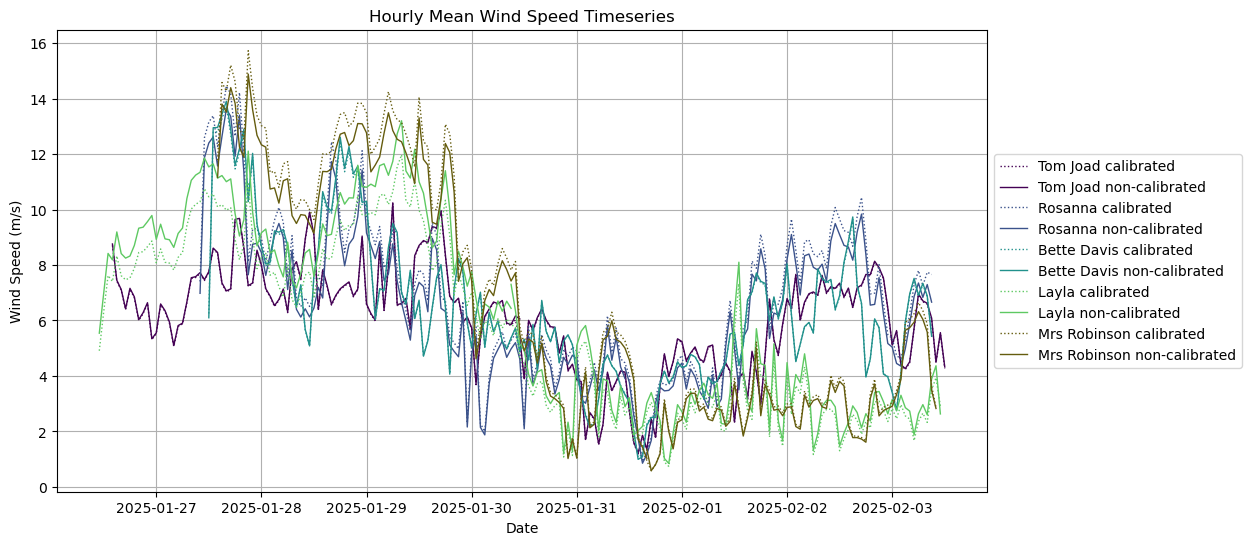

In [123]:
# Wind speed timeseries
fig, ax = plt.subplots(figsize=(12, 6))

for i, station in enumerate(stations_str):
    # Resample data to hourly mean
    # hourly_mean = aws_Cal_data[station].resample('H').mean()

    # Plot using hourly mean data
    ax.plot(aws_Cal_data[station].resample('h').mean().index, aws_Cal_data[station].resample('h').mean().calibrated_wind_speed, label=f'{station} calibrated', linewidth=1, color=color_idx[i], linestyle=':')
    ax.plot(aws_nonCal_data[station][0].resample('h').mean().index, aws_nonCal_data[station][0].resample('h').mean().wind_speed, label=f'{station} non-calibrated', linewidth=1, color=color_idx[i])
    ax.plot(aws_nonCal_data[station][1].resample('h').mean().index, aws_nonCal_data[station][1].resample('h').mean().wind_speed, linewidth=1, color=color_idx[i])


ax.set_xlabel("Date")
ax.set_ylabel("Wind Speed (m/s)")
ax.set_title("Hourly Mean Wind Speed Timeseries")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.grid()

#save_figure(fig, '../figs/', 'Hourly_Mean_windSpeed_timeseries_cal_nonCal')



Text(0.06, 0.5, 'Wind Speed (m/s)')

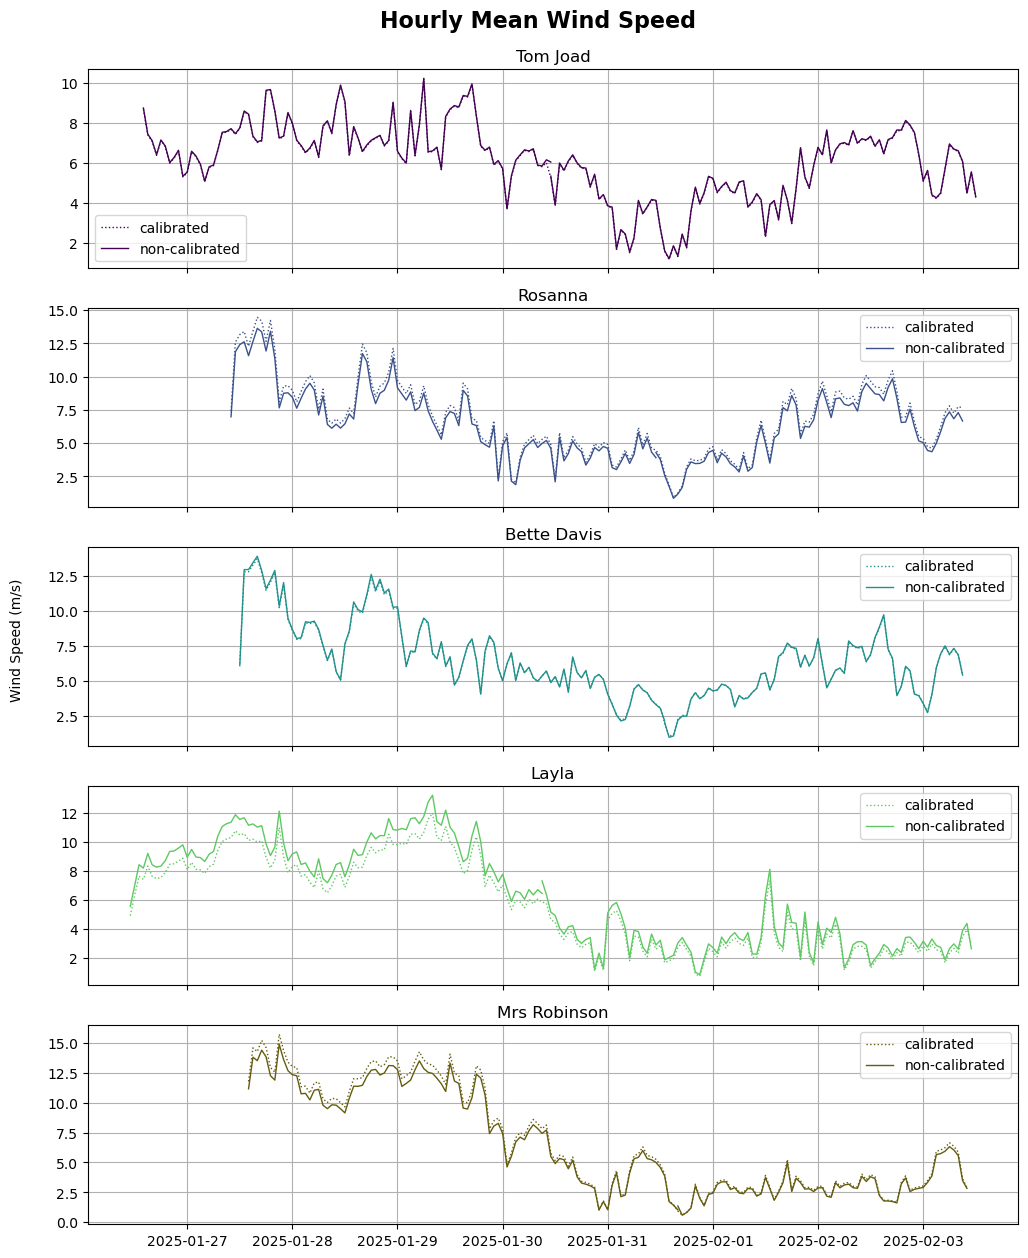

In [124]:
# Create 5 subplots (one for each station)
fig, axes = plt.subplots(nrows=5, sharex=True, figsize=(12, 15))  # 5 rows, shared x-axis

for i, station in enumerate(stations_str):
    ax = axes[i]  # Select the subplot for this station

    # Resample data to hourly mean
    aws_Cal_hourly = aws_Cal_data[station].resample('h').mean()
    aws_nonCal_hourly_1 = aws_nonCal_data[station][0].resample('h').mean()
    aws_nonCal_hourly_2 = aws_nonCal_data[station][1].resample('h').mean()

    # Plot using hourly mean data
    ax.plot(aws_Cal_hourly.index, aws_Cal_hourly.calibrated_wind_speed, label='calibrated', linewidth=1, color=color_idx[i], linestyle=':')
    ax.plot(aws_nonCal_hourly_1.index, aws_nonCal_hourly_1.wind_speed, label='non-calibrated', linewidth=1, color=color_idx[i])
    ax.plot(aws_nonCal_hourly_2.index, aws_nonCal_hourly_2.wind_speed, linewidth=1, color=color_idx[i])

    ax.set_title(station)
    ax.legend()
    ax.grid()

fig.suptitle('Hourly Mean Wind Speed', fontsize=16, fontweight='bold', y=0.92)
fig.text(0.06, 0.5, "Wind Speed (m/s)", va='center', rotation='vertical')#, fontsize=12, fontweight='bold')

#save_figure(fig, '../figs/', 'Hourly_Mean_windSpeed_timeseries_cal_nonCal_subFig')

Text(0.06, 0.5, 'Wind Speed (m/s)')

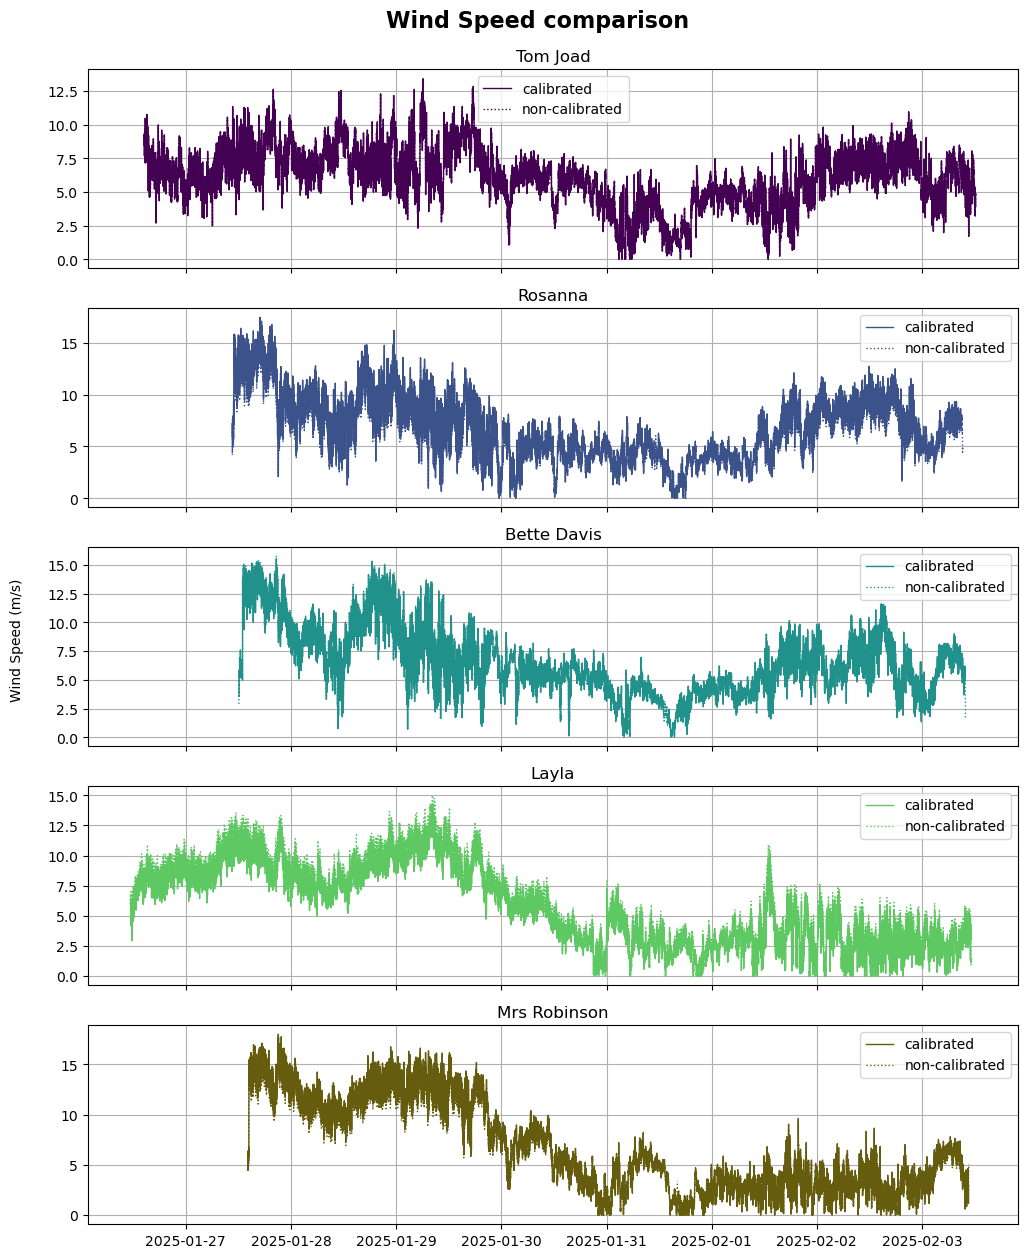

In [125]:
# Create 5 subplots (one for each station)
fig, axes = plt.subplots(nrows=5, sharex=True, figsize=(12, 15))  # 5 rows, shared x-axis

for i, station in enumerate(stations_str):
    ax = axes[i]  # Select the subplot for this station

    # Resample data to hourly mean
    aws_Cal_hourly = aws_Cal_data[station]
    aws_nonCal_hourly_1 = aws_nonCal_data[station][0]
    aws_nonCal_hourly_2 = aws_nonCal_data[station][1]

    # Plot using hourly mean data
    ax.plot(aws_Cal_hourly.index, aws_Cal_hourly.calibrated_wind_speed, label='calibrated', linewidth=1, color=color_idx[i])#, linestyle=':')
    ax.plot(aws_nonCal_hourly_1.index, aws_nonCal_hourly_1.wind_speed, label='non-calibrated', linewidth=1, color=color_idx[i], linestyle=':')
    ax.plot(aws_nonCal_hourly_2.index, aws_nonCal_hourly_2.wind_speed, linewidth=1, color=color_idx[i], linestyle=':')

    ax.set_title(station)
    ax.legend()
    ax.grid()

fig.suptitle('Wind Speed comparison', fontsize=16, fontweight='bold', y=0.92)
fig.text(0.06, 0.5, "Wind Speed (m/s)", va='center', rotation='vertical')#, fontsize=12, fontweight='bold')



Text(0.06, 0.5, 'Temperature (deg C)')

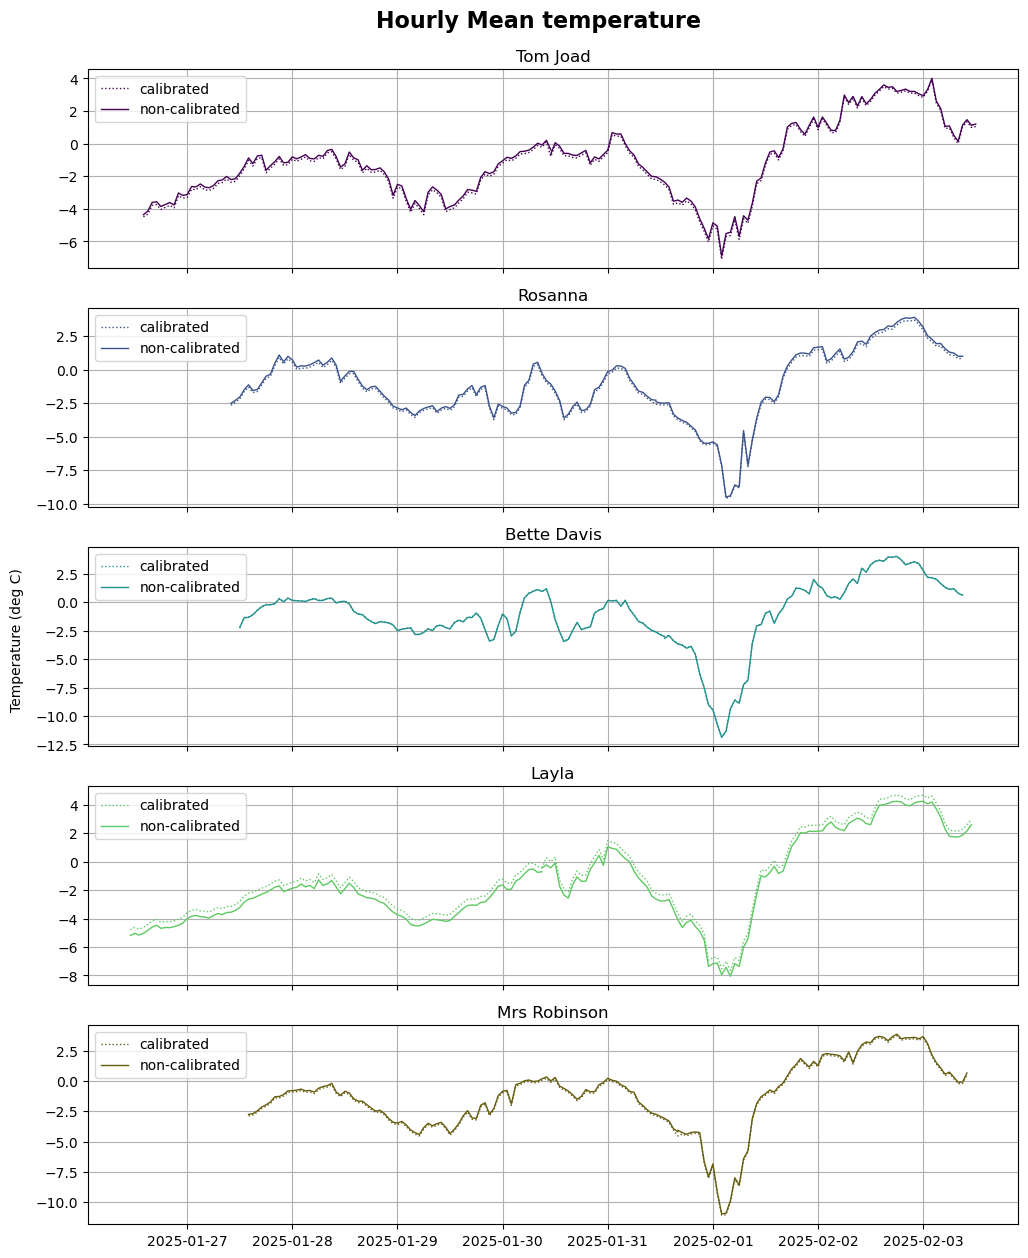

In [126]:
# Create 5 subplots (one for each station)
fig, axes = plt.subplots(nrows=5, sharex=True, figsize=(12, 15))  # 5 rows, shared x-axis

for i, station in enumerate(stations_str):
    ax = axes[i]  # Select the subplot for this station

    # Resample data to hourly mean
    aws_Cal_hourly = aws_Cal_data[station].resample('h').mean()
    aws_nonCal_hourly_1 = aws_nonCal_data[station][0].resample('h').mean()
    aws_nonCal_hourly_2 = aws_nonCal_data[station][1].resample('h').mean()

    # Plot using hourly mean data
    ax.plot(aws_Cal_hourly.index, aws_Cal_hourly.temperature, label='calibrated', linewidth=1, color=color_idx[i], linestyle=':')
    ax.plot(aws_nonCal_hourly_1.index, aws_nonCal_hourly_1.temperature, label='non-calibrated', linewidth=1, color=color_idx[i])
    ax.plot(aws_nonCal_hourly_2.index, aws_nonCal_hourly_2.temperature, linewidth=1, color=color_idx[i])

    ax.set_title(station)
    ax.legend()
    ax.grid()

fig.suptitle('Hourly Mean temperature', fontsize=16, fontweight='bold', y=0.92)
fig.text(0.06, 0.5, "Temperature (deg C)", va='center', rotation='vertical')#, fontsize=12, fontweight='bold')

#save_figure(fig, '../figs/', 'Hourly_Mean_temp_timeseries_cal_nonCal_subFig')

Text(0.06, 0.5, 'Relative humidity (%)')

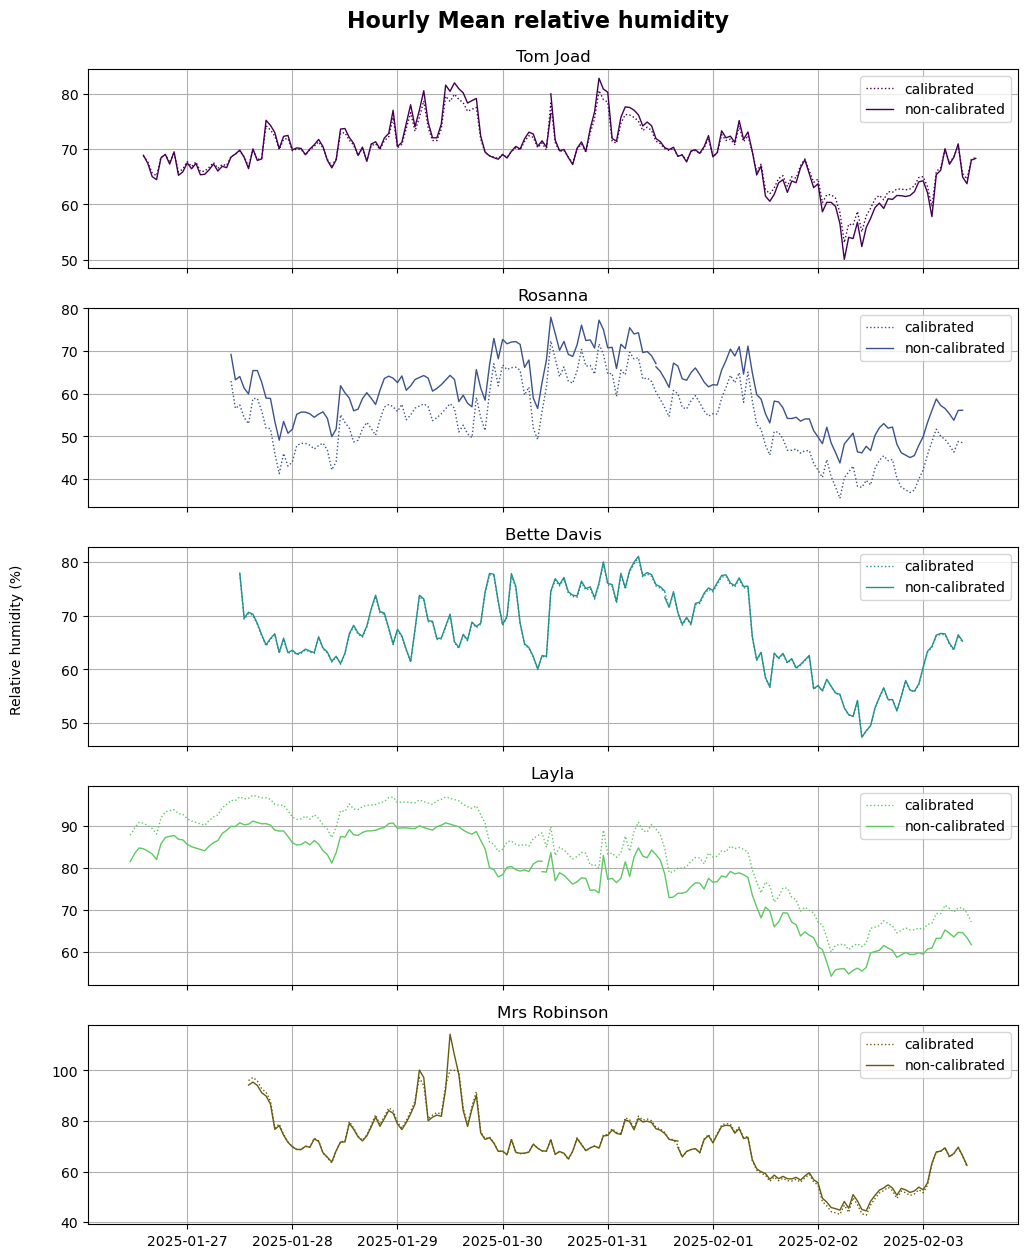

In [127]:
# Create 5 subplots (one for each station)
fig, axes = plt.subplots(nrows=5, sharex=True, figsize=(12, 15))  # 5 rows, shared x-axis

for i, station in enumerate(stations_str):
    ax = axes[i]  # Select the subplot for this station

    # Resample data to hourly mean
    aws_Cal_hourly = aws_Cal_data[station].resample('h').mean()
    aws_nonCal_hourly_1 = aws_nonCal_data[station][0].resample('h').mean()
    aws_nonCal_hourly_2 = aws_nonCal_data[station][1].resample('h').mean()

    # Plot using hourly mean data
    ax.plot(aws_Cal_hourly.index, aws_Cal_hourly.calibrated_rel_humidity, label='calibrated', linewidth=1, color=color_idx[i], linestyle=':')
    ax.plot(aws_nonCal_hourly_1.index, aws_nonCal_hourly_1.rel_humidity, label='non-calibrated', linewidth=1, color=color_idx[i])
    ax.plot(aws_nonCal_hourly_2.index, aws_nonCal_hourly_2.rel_humidity, linewidth=1, color=color_idx[i])

    ax.set_title(station)
    ax.legend()
    ax.grid()

fig.suptitle('Hourly Mean relative humidity', fontsize=16, fontweight='bold', y=0.92)
fig.text(0.06, 0.5, "Relative humidity (%)", va='center', rotation='vertical')#, fontsize=12, fontweight='bold')

#save_figure(fig, '../figs/', 'Hourly_Mean_relHumidity_timeseries_cal_nonCal_subFig')

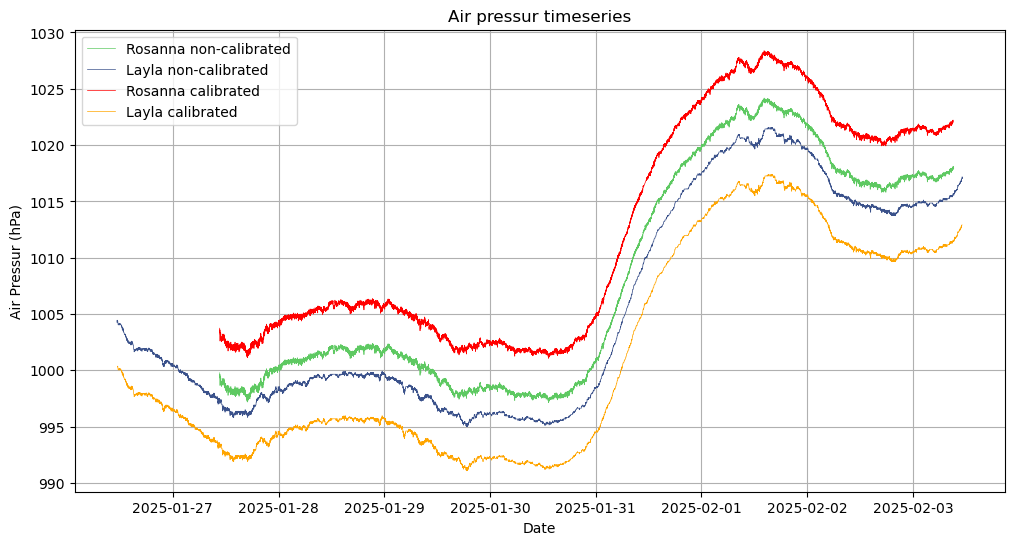

In [128]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(aws_nonCal_data['Rosanna'][0].index, aws_nonCal_data['Rosanna'][0].air_pressure, label='Rosanna non-calibrated', linewidth = 0.5, color=color_idx[3])
ax.plot(aws_nonCal_data['Rosanna'][1].index, aws_nonCal_data['Rosanna'][1].air_pressure, linewidth = 0.5, color=color_idx[3])
ax.plot(aws_nonCal_data['Layla'][0].index, aws_nonCal_data['Layla'][0].air_pressure, label='Layla non-calibrated', linewidth = 0.5, color=color_idx[1])
ax.plot(aws_nonCal_data['Layla'][1].index, aws_nonCal_data['Layla'][1].air_pressure, linewidth = 0.5, color=color_idx[1])

ax.plot(aws_Cal_data['Rosanna'].index, aws_Cal_data['Rosanna'].calibrated_air_pressure, label='Rosanna calibrated', color='red', linewidth = 0.5)
# ax.plot(aws_Cal_data['Rosanna'][1].index, aws_Cal_data['Rosanna'][1].calibrated_air_pressure, color=color_idx[3], linestyle=':')
ax.plot(aws_Cal_data['Layla'].index, aws_Cal_data['Layla'].calibrated_air_pressure, label='Layla calibrated', color='orange', linewidth = 0.5)
# ax.plot(aws_Cal_data['Layla'][1].index, aws_Cal_data['Layla'][1].calibrated_air_pressure, color=color_idx[1], linestyle=':')

ax.legend()
ax.set_xlabel("Date")
ax.set_ylabel("Air Pressur (hPa)")
ax.set_title("Air pressur timeseries")
ax.grid()

#save_figure(fig, '../figs/', 'Cal_noCal_pressure_timeseries')